# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Steffany Florence SM
- **Email:** sflorence@student.ciputra.ac.id
- **ID Dicoding:** steffany_sugiarto_mulijono_bskL

## Menentukan Pertanyaan Bisnis

- Pada musim apa terjadi paling banyak transaksi penyewaan sepeda?
- Berapa rata-rata jumlah penyewaan sepeda dalam 1 bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode di atas berfungsi untuk menampilkan 5 data teratas pada masing-masing dataset

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Data redundancy: ", day_df.duplicated().sum())

Data redundancy:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Data redundancy: ", hour_df.duplicated().sum())

Data redundancy:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua dataset memiliki data yang bersih, tidak terdapat data yang kosong, tidak sesuai, ataupun data yang berulang.

### Cleaning Data

In [12]:
day_df.season.replace({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Salju'}, inplace=True)
hour_df.season.replace({1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Salju'}, inplace=True)

In [13]:
day_df.mnth.replace({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}, inplace=True)
hour_df.mnth.replace({1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}, inplace=True)

**Insight:**
- Meskipun kedua dataset memiliki data yang bersih, namun disini saya melakukan penggantian nama pada beberapa variabel agar lebih mudah untuk dibaca.

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Gugur,NaN,Januari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,1.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,1.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [15]:
print('Jumlah penyewa pada musim semi  : ',day_df.loc[day_df['season']=='Semi', 'instant'].count())
print('Jumlah penyewa pada musim panas : ',day_df.loc[day_df['season']=='Panas', 'instant'].count())
print('Jumlah penyewa pada musim gugur : ',day_df.loc[day_df['season']=='Gugur', 'instant'].count())
print('Jumlah penyewa pada musim salju : ',day_df.loc[day_df['season']=='Salju', 'instant'].count())

Jumlah penyewa pada musim semi  :  181
Jumlah penyewa pada musim panas :  184
Jumlah penyewa pada musim gugur :  188
Jumlah penyewa pada musim salju :  178


In [16]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Gugur,NaN,Mei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,1.000000,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,1.000000,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [18]:
hour_df.groupby(by="mnth").agg({
    'cnt': 'count'
})

,cnt
mnth,
Agustus,1475
April,1437
Desember,1483
Februari,1341
Januari,1429
Juli,1488
Juni,1440
Maret,1473
Mei,1488


In [21]:
total_sepeda_tersewa={
    'Januari': hour_df.loc[hour_df['mnth']=='Januari', 'cnt'].count(),
    'Februari': hour_df.loc[hour_df['mnth']=='Februari', 'cnt'].count(),
    'Maret': hour_df.loc[hour_df['mnth']=='Maret', 'cnt'].count(),
    'April': hour_df.loc[hour_df['mnth']=='April', 'cnt'].count(),
    'Mei': hour_df.loc[hour_df['mnth']=='Mei', 'cnt'].count(),
    'Juni': hour_df.loc[hour_df['mnth']=='Juni', 'cnt'].count(),
    'Juli': hour_df.loc[hour_df['mnth']=='Juli', 'cnt'].count(),
    'Agustus': hour_df.loc[hour_df['mnth']=='Agustus', 'cnt'].count(),
    'September': hour_df.loc[hour_df['mnth']=='September', 'cnt'].count(),
    'Oktober': hour_df.loc[hour_df['mnth']=='Oktober', 'cnt'].count(),
    'November': hour_df.loc[hour_df['mnth']=='November', 'cnt'].count(),
    'Desember': hour_df.loc[hour_df['mnth']=='Desember', 'cnt'].count(),
}
total_sepeda_tersewa_df = pd.DataFrame.from_dict(total_sepeda_tersewa, orient='index', columns=['rata_rata_tersewa_per_bulan'])

print(total_sepeda_tersewa_df.mean())

rata_rata_tersewa_per_bulan    1448.25
dtype: float64


**Insight:**
- Berdasarkan rangkuman pada data day_df, terdapat informasi jumlah penyewa sebanyak 731 orang yang paling banyak melakukan penyewaan sepeda pada musim gugur (musim gugur direpresentasikan dengan angka 3).
- Penyewaan sepeda paling lama berada pada bulan Mei dan Juli.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

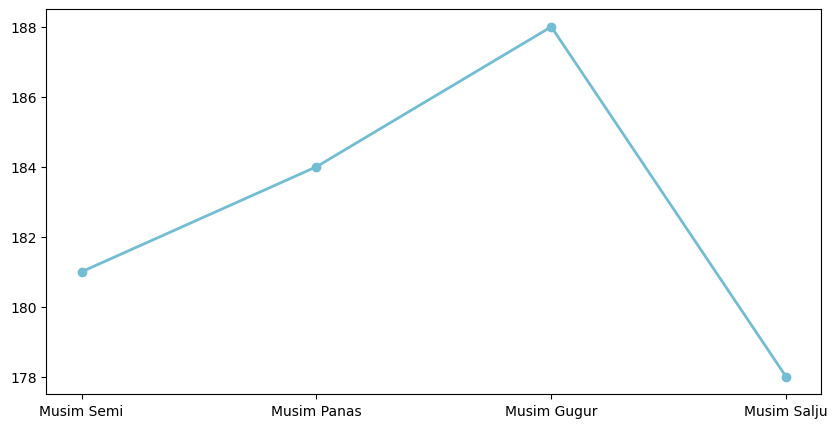

In [22]:
total_penyewa={
    'Musim Semi': day_df.loc[day_df['season']=='Semi', 'instant'].count(),
    'Musim Panas': day_df.loc[day_df['season']=='Panas', 'instant'].count(),
    'Musim Gugur': day_df.loc[day_df['season']=='Gugur', 'instant'].count(),
    'Musim Salju': day_df.loc[day_df['season']=='Salju', 'instant'].count()
}

total_penyewa_df = pd.DataFrame.from_dict(total_penyewa, orient='index', columns=['count'])

plt.figure(figsize=(10, 5))
plt.plot(
    total_penyewa_df,
    marker='o',
    linewidth=2,
    color='#72BCD4'
)

### Pertanyaan 2:

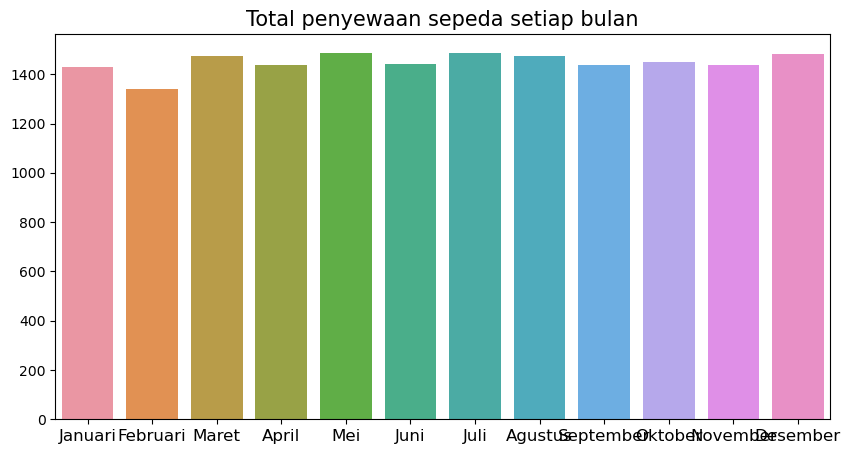

In [24]:
month=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

plt.figure(figsize=(10, 5))
sns.barplot(
    y='rata_rata_tersewa_per_bulan',
    x=month,
    data=total_sepeda_tersewa_df
)

plt.title("Total penyewaan sepeda setiap bulan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Pada dataset day, digunakan visualisasi data berupa linechart yang bertujuan untuk menunjukkan minat penyewaan sepeda pada setiap musim yang ditunjukan dari jumlah penyewa sepeda pada masing-masing musim.
- Sedangkan pada dataset hour, digunakan visualisasi data berupa barchart yang bertujuan untuk menunjukkan total sepeda yang tersewa pada setiap bulannya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Transaksi penyewaan sepeda terjadi paling banyak pada musim gugur.
- Rata-rata jumlah sepeda yang tersewa dalam 1 bulan yaitu 1448 sepeda.